In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [111]:
df= pd.read_csv("final_dataset.csv")
x=df
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80368 entries, 0 to 80367
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                80368 non-null  int64  
 1   id                        80368 non-null  float64
 2   url                       80368 non-null  object 
 3   type                      80368 non-null  object 
 4   subtype                   80368 non-null  object 
 5   bedroomCount              73558 non-null  float64
 6   bathroomCount             66672 non-null  float64
 7   province                  80368 non-null  object 
 8   locality                  80368 non-null  object 
 9   postCode                  80368 non-null  int64  
 10  habitableSurface          67783 non-null  float64
 11  roomCount                 21948 non-null  float64
 12  monthlyCost               0 non-null      float64
 13  hasAttic                  12516 non-null  object 
 14  hasBas

Index(['Unnamed: 0', 'id', 'url', 'type', 'subtype', 'bedroomCount',
       'bathroomCount', 'province', 'locality', 'postCode', 'habitableSurface',
       'roomCount', 'monthlyCost', 'hasAttic', 'hasBasement',
       'hasDressingRoom', 'diningRoomSurface', 'hasDiningRoom',
       'buildingCondition', 'buildingConstructionYear', 'facedeCount',
       'floorCount', 'streetFacadeWidth', 'hasLift', 'floodZoneType',
       'heatingType', 'hasHeatPump', 'hasPhotovoltaicPanels',
       'hasThermicPanels', 'kitchenSurface', 'kitchenType', 'landSurface',
       'hasLivingRoom', 'livingRoomSurface', 'hasBalcony', 'hasGarden',
       'gardenSurface', 'gardenOrientation', 'parkingCountIndoor',
       'parkingCountOutdoor', 'hasAirConditioning', 'hasArmoredDoor',
       'hasVisiophone', 'hasOffice', 'toiletCount', 'hasSwimmingPool',
       'hasFireplace', 'hasTerrace', 'terraceSurface', 'terraceOrientation',
       'accessibleDisabledPeople', 'epcScore', 'price'],
      dtype='object')

In [ ]:
'''df["locality"]=df["locality"].str.lower()
df["locality"].value_counts()
df["postCode"].value_counts()
#| Brussels | 1000–1299             |                                              #
#| Flanders | 1500–3999             |                                              #
#| Wallonia | 1300–1499 & 4000–7999 |  
# 
if df["postCode"] isin(range(1000:1300)):
    df["province"]="Brussels"
elif df["postCode"] isin(range(1500:4000)):
    df["province"]="Flanders"
if df["postCode"] isin(range(1300:1500) or range(4000–8000)):
    df["province"]="Wallonia"
    
conditions = [
    df["postCode"].between(1000, 1299), # Brussels-Capital Region (postcodes 1000 to 1299)
    df["postCode"].between(1500, 3999), # Flanders (postcodes 1500 to 3999)
    # Combine Wallonia ranges using '|' (OR) operator for boolean Series
    (df["postCode"].between(1300, 1499)) | (df["postCode"].between(4000, 7999)) # Wallonia
]
choices = ["Brussels", "Flanders", "Wallonia"]
df["province"] = np.select(conditions, choices)'''



In [107]:
df["province"].value_counts()
Flanders=["West Flanders","East Flanders","Antwerp","Flemish Brabant", "Limburg"]
Wallonia=["Walloon Brabant", "Hainaut" , "Liège" , "Namur", "Luxembourg"]
df.loc[df["province"].isin(Flanders), "province"] = "Flanders"
df.loc[df["province"].isin(Wallonia), "province"] = "Wallonia"
df["province"].value_counts()    

province
Flanders    49286
Wallonia    22728
Brussels     8354
Name: count, dtype: int64

In [68]:
df.duplicated().sum()
for col in df.columns:
    if col.startswith("has"):
        print(f"{col}:  {df[col].isnull().sum()}")

hasAttic:  67852
hasBasement:  51053
hasDressingRoom:  77740
hasDiningRoom:  66227
hasLift:  61324
hasHeatPump:  72895
hasPhotovoltaicPanels:  72320
hasThermicPanels:  77256
hasLivingRoom:  37492
hasBalcony:  80368
hasGarden:  64410
hasAirConditioning:  79244
hasArmoredDoor:  76670
hasVisiophone:  64377
hasOffice:  69981
hasSwimmingPool:  78552
hasFireplace:  77324
hasTerrace:  32939


In [69]:
df["hasTerrace"].value_counts()

hasTerrace
True    47429
Name: count, dtype: int64

In [70]:
#print(df["hasOffice"].value_counts())  
print(df["hasLivingRoom"].value_counts() )      # was having 37492 nulls
print(df["hasTerrace"].value_counts())  

boolean_cols=["hasTerrace","hasLivingRoom"]
for col in boolean_cols:    
    df[col] = df[col].map({np.nan: False})
df.isnull().sum()

hasLivingRoom
True    42876
Name: count, dtype: int64
hasTerrace
True    47429
Name: count, dtype: int64


Unnamed: 0                      0
id                              0
url                             0
type                            0
subtype                         0
bedroomCount                 6810
bathroomCount               13696
province                        0
locality                        0
postCode                        0
habitableSurface            12585
roomCount                   58420
monthlyCost                 80368
hasAttic                    67852
hasBasement                 51053
hasDressingRoom             77740
diningRoomSurface           73467
hasDiningRoom               66227
buildingCondition           22376
buildingConstructionYear    31262
facedeCount                 27129
floorCount                  42822
streetFacadeWidth           64858
hasLift                     61324
floodZoneType               35902
heatingType                 33215
hasHeatPump                 72895
hasPhotovoltaicPanels       72320
hasThermicPanels            77256
kitchenSurface

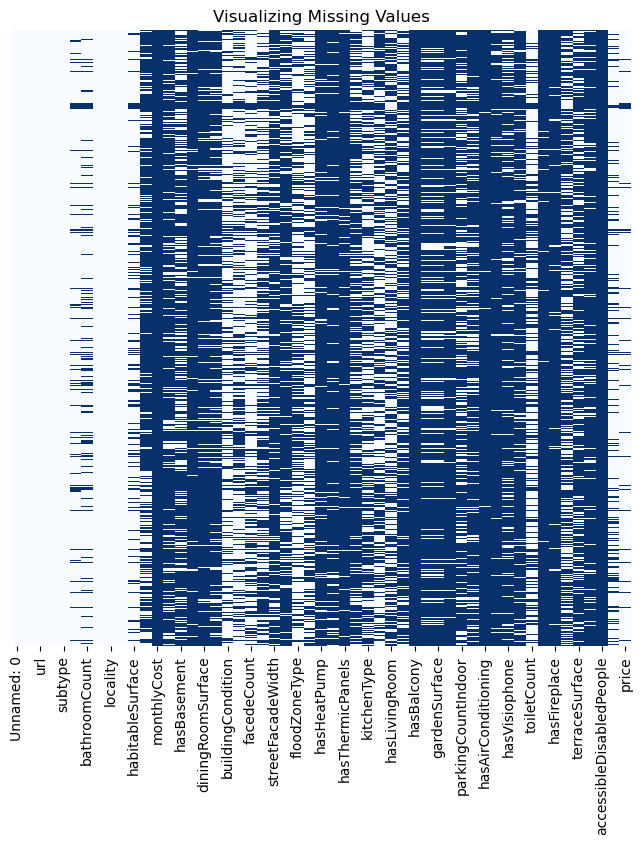

In [71]:
plt.figure(figsize=(8,8))
plt.title("Visualizing Missing Values")
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="Blues")
plt.show()

In [72]:
df.isnull().sum()/df.shape[0]*100 

Unnamed: 0                    0.000000
id                            0.000000
url                           0.000000
type                          0.000000
subtype                       0.000000
bedroomCount                  8.473522
bathroomCount                17.041609
province                      0.000000
locality                      0.000000
postCode                      0.000000
habitableSurface             15.659218
roomCount                    72.690623
monthlyCost                 100.000000
hasAttic                     84.426637
hasBasement                  63.524039
hasDressingRoom              96.730042
diningRoomSurface            91.413249
hasDiningRoom                82.404688
buildingCondition            27.841927
buildingConstructionYear     38.898567
facedeCount                  33.755973
floorCount                   53.282401
streetFacadeWidth            80.701274
hasLift                      76.304002
floodZoneType                44.672009
heatingType              

In [73]:
cols_todrop=df.columns[df.isnull().sum()/df.shape[0]*100>42]
cols_todrop, len(cols_todrop)

(Index(['roomCount', 'monthlyCost', 'hasAttic', 'hasBasement',
        'hasDressingRoom', 'diningRoomSurface', 'hasDiningRoom', 'floorCount',
        'streetFacadeWidth', 'hasLift', 'floodZoneType', 'hasHeatPump',
        'hasPhotovoltaicPanels', 'hasThermicPanels', 'kitchenSurface',
        'kitchenType', 'landSurface', 'hasLivingRoom', 'livingRoomSurface',
        'hasBalcony', 'hasGarden', 'gardenSurface', 'gardenOrientation',
        'parkingCountIndoor', 'parkingCountOutdoor', 'hasAirConditioning',
        'hasArmoredDoor', 'hasVisiophone', 'hasOffice', 'hasSwimmingPool',
        'hasFireplace', 'hasTerrace', 'terraceSurface', 'terraceOrientation',
        'accessibleDisabledPeople'],
       dtype='object'),
 35)

In [74]:
df.drop(columns=cols_todrop, inplace=True)
df.drop(columns=["Unnamed: 0","id","url"], inplace=True)
df.isnull().sum(), df.shape

(type                            0
 subtype                         0
 bedroomCount                 6810
 bathroomCount               13696
 province                        0
 locality                        0
 postCode                        0
 habitableSurface            12585
 buildingCondition           22376
 buildingConstructionYear    31262
 facedeCount                 27129
 heatingType                 33215
 toiletCount                 25274
 epcScore                    14977
 price                        3998
 dtype: int64,
 (80368, 15))

In [75]:
df=df[~(df["price"].isnull())]
df.isnull().sum(), df.shape

(type                            0
 subtype                         0
 bedroomCount                 2820
 bathroomCount                9705
 province                        0
 locality                        0
 postCode                        0
 habitableSurface             8590
 buildingCondition           18381
 buildingConstructionYear    27268
 facedeCount                 23136
 heatingType                 29220
 toiletCount                 21280
 epcScore                    11966
 price                           0
 dtype: int64,
 (76370, 15))

In [76]:
df[df.isnull().sum(axis=1)>1]

type      subtype  bedroomCount  bathroomCount       province  \
27     APARTMENT    PENTHOUSE           NaN            NaN       Brussels   
38     APARTMENT    APARTMENT           2.0            2.0       Brussels   
45     APARTMENT    APARTMENT           2.0            2.0       Brussels   
53     APARTMENT  FLAT_STUDIO           NaN            1.0       Brussels   
54     APARTMENT    APARTMENT           3.0            2.0       Brussels   
...          ...          ...           ...            ...            ...   
80360  APARTMENT    APARTMENT           3.0            2.0  East Flanders   
80361  APARTMENT    APARTMENT           2.0            NaN  East Flanders   
80362      HOUSE        HOUSE           4.0            2.0  East Flanders   
80366  APARTMENT    APARTMENT           3.0            2.0  West Flanders   
80367  APARTMENT    APARTMENT           3.0            2.0        Antwerp   

        locality  postCode  habitableSurface buildingCondition  \
27     Etterbeek      1040             229.0              GOOD   
38     Etterbeek      1040             187.0               NaN   
45     Etterbeek      1040             220.0               NaN   
53     Etterbeek      1040              37.0            AS_NEW   
54     ETTERBEEK      1040             220.0    JUST_RENOVATED   
...          ...       ...               ...               ...   
80360   Maldegem      9990             129.0            AS_NEW   
80361   Maldegem      9990               NaN              GOOD   
80362   Maldegem      9990             242.0               NaN   
80366   Westende      8434             111.0    JUST_RENOVATED   
80367    Wilrijk      2610             132.0              GOOD   

       buildingConstructionYear  facedeCount heatingType  toiletCount  \
27                       1932.0          2.0         GAS          2.0   
38                          NaN          2.0         GAS          3.0   
45                          NaN          2.0         GAS          3.0   
53                       2023.0          2.0         NaN          1.0   
54                          NaN          NaN         GAS          3.0   
...                         ...          ...         ...          ...   
80360                    2023.0          2.0         NaN          2.0   
80361                       NaN          2.0         NaN          NaN   
80362                    2025.0          4.0         NaN          NaN   
80366                       NaN          NaN         GAS          2.0   
80367                    1964.0          NaN         NaN          2.0   

      epcScore     price  
27           D  739000.0  
38           C  795000.0  
45           C  950000.0  
53           A  290000.0  
54           C  950000.0  
...        ...       ...  
80360      NaN  475000.0  
80361        E  199000.0  
80362      NaN  649000.0  
80366        A  325000.0  
80367        B  340000.0  

[42151 rows x 15 columns]

In [77]:
df=df[~(df.isnull().sum(axis=1)>1)]
df.isnull().sum(), df.shape

(type                           0
 subtype                        0
 bedroomCount                 216
 bathroomCount                648
 province                       0
 locality                       0
 postCode                       0
 habitableSurface             729
 buildingCondition           1519
 buildingConstructionYear    5935
 facedeCount                 3287
 heatingType                 3565
 toiletCount                 2003
 epcScore                     520
 price                          0
 dtype: int64,
 (34219, 15))

In [78]:
df = df.replace([np.inf, -np.inf], np.nan)
numeric_cols = df.select_dtypes("number")
numeric_cols.corr()*100

bedroomCount  bathroomCount    postCode  \
bedroomCount                100.000000      10.198958    0.869309   
bathroomCount                10.198958     100.000000   -1.055818   
postCode                      0.869309      -1.055818  100.000000   
habitableSurface             22.887214       2.870072   -1.504058   
buildingConstructionYear    -18.442834      -9.254870    6.847309   
facedeCount                  21.211278       1.488541    5.737636   
toiletCount                   7.719624       1.338358   -0.100419   
price                        38.120552       8.051166   -3.812686   

                          habitableSurface  buildingConstructionYear  \
bedroomCount                     22.887214                -18.442834   
bathroomCount                     2.870072                 -9.254870   
postCode                         -1.504058                  6.847309   
habitableSurface                100.000000                 -6.480614   
buildingConstructionYear         -6.480614                100.000000   
facedeCount                       9.722271                  8.110408   
toiletCount                       2.468663                 -1.329755   
price                            19.019587                  4.683024   

                          facedeCount  toiletCount       price  
bedroomCount                21.211278     7.719624   38.120552  
bathroomCount                1.488541     1.338358    8.051166  
postCode                     5.737636    -0.100419   -3.812686  
habitableSurface             9.722271     2.468663   19.019587  
buildingConstructionYear     8.110408    -1.329755    4.683024  
facedeCount                100.000000     1.650783   17.625783  
toiletCount                  1.650783   100.000000    9.113963  
price                       17.625783     9.113963  100.000000

In [79]:
df=df[~(df["bedroomCount"].isnull())]
df=df[~(df["facedeCount"].isnull())]
df.drop(columns="buildingConstructionYear", inplace=True)

In [53]:
df["bathroomCount"]=df["bathroomCount"].fillna(df.groupby('subtype')['bathroomCount'].transform('mean'))
df["toiletCount"]=df["toiletCount"].fillna("missing")
df["epcScore"]=df["epcScore"].fillna("missing")
df["heatingType"]=df["heatingType"].fillna("missing")
df["habitableSurface"]=df["habitableSurface"].fillna("missing")
df["buildingCondition"]=df["buildingCondition"].fillna("missing")

In [54]:
df

type      subtype  bedroomCount  bathroomCount       province  \
0      APARTMENT    APARTMENT           2.0            1.0       Brussels   
1          HOUSE        HOUSE           4.0            2.0       Brussels   
2      APARTMENT    APARTMENT           2.0            1.0       Brussels   
4      APARTMENT  FLAT_STUDIO           1.0            1.0       Brussels   
5      APARTMENT    APARTMENT           2.0            1.0       Brussels   
...          ...          ...           ...            ...            ...   
80333      HOUSE        HOUSE           3.0            1.0  East Flanders   
80334      HOUSE        HOUSE           3.0            2.0  East Flanders   
80352  APARTMENT    APARTMENT           2.0            1.0  East Flanders   
80363      HOUSE        VILLA           3.0            1.0        Antwerp   
80364  APARTMENT    APARTMENT           3.0            1.0       Brussels   

         locality  postCode habitableSurface buildingCondition  facedeCount  \
0       Etterbeek      1040            100.0              GOOD          1.0   
1       Etterbeek      1040            270.0     TO_BE_DONE_UP          2.0   
2       Etterbeek      1040             87.0            AS_NEW          2.0   
4       Etterbeek      1040             71.0            AS_NEW          2.0   
5       ETTERBEEK      1040             90.0     TO_BE_DONE_UP          2.0   
...           ...       ...              ...               ...          ...   
80333    Maldegem      9990            211.0              GOOD          4.0   
80334    Maldegem      9990            160.0            AS_NEW          2.0   
80352    Maldegem      9990            100.0            AS_NEW          2.0   
80363  Willebroek      2830            252.0            AS_NEW          4.0   
80364       Jette      1090             94.0              GOOD          4.0   

      heatingType toiletCount epcScore     price  
0             GAS         1.0        C  399000.0  
1         FUELOIL         3.0        E  895000.0  
2         FUELOIL         1.0        F  465000.0  
4             GAS         1.0        E  289000.0  
5             GAS         1.0        D  375000.0  
...           ...         ...      ...       ...  
80333         GAS         1.0        E  339000.0  
80334         GAS         2.0        A  395000.0  
80352     missing         2.0       A+  350000.0  
80363     missing         3.0        B  849000.0  
80364         GAS         1.0        D  279000.0  

[30716 rows x 14 columns]

In [55]:
#df["bathroomCount"].value_counts()
#df[df["bathroomCount"]>5]


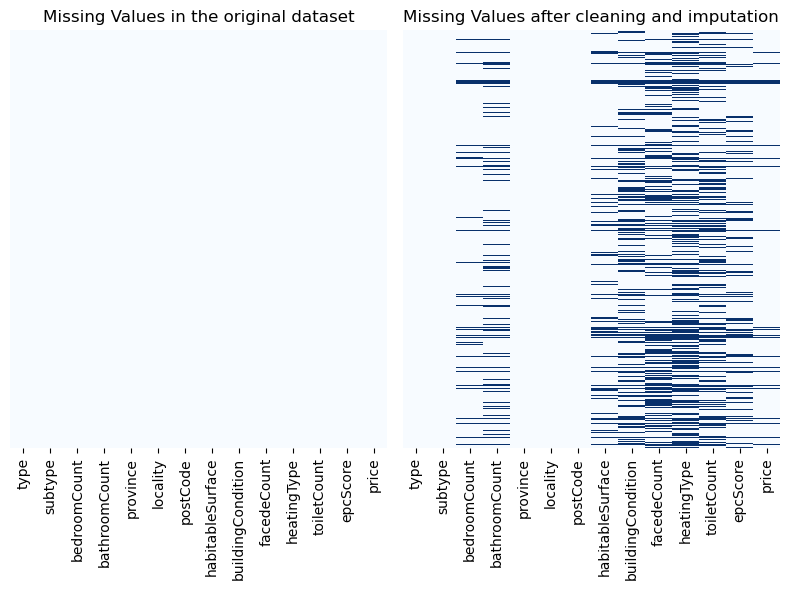

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6))  # combined figsize for both plots

# heatmap of original dataset
sns.heatmap(x[df.columns].isnull(), cbar=False, yticklabels=False, cmap="Blues", ax=axes[1])
axes[0].set_title("Missing Values in the original dataset")

# heatmap after cleaning
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="Blues", ax=axes[0])
axes[1].set_title("Missing Values after cleaning and imputation")

plt.tight_layout()
plt.show()

In [57]:
numeric_cols.corr()

bedroomCount  bathroomCount  postCode  \
bedroomCount                  1.000000       0.101990  0.008693   
bathroomCount                 0.101990       1.000000 -0.010558   
postCode                      0.008693      -0.010558  1.000000   
habitableSurface              0.228872       0.028701 -0.015041   
buildingConstructionYear     -0.184428      -0.092549  0.068473   
facedeCount                   0.212113       0.014885  0.057376   
toiletCount                   0.077196       0.013384 -0.001004   
price                         0.381206       0.080512 -0.038127   

                          habitableSurface  buildingConstructionYear  \
bedroomCount                      0.228872                 -0.184428   
bathroomCount                     0.028701                 -0.092549   
postCode                         -0.015041                  0.068473   
habitableSurface                  1.000000                 -0.064806   
buildingConstructionYear         -0.064806                  1.000000   
facedeCount                       0.097223                  0.081104   
toiletCount                       0.024687                 -0.013298   
price                             0.190196                  0.046830   

                          facedeCount  toiletCount     price  
bedroomCount                 0.212113     0.077196  0.381206  
bathroomCount                0.014885     0.013384  0.080512  
postCode                     0.057376    -0.001004 -0.038127  
habitableSurface             0.097223     0.024687  0.190196  
buildingConstructionYear     0.081104    -0.013298  0.046830  
facedeCount                  1.000000     0.016508  0.176258  
toiletCount                  0.016508     1.000000  0.091140  
price                        0.176258     0.091140  1.000000

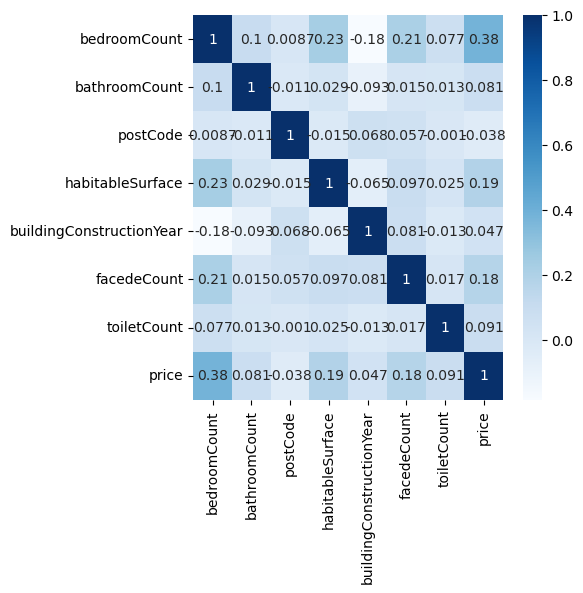

In [59]:
plt.figure(figsize=(5,5))
sns.heatmap(numeric_cols.corr(),  cmap="Blues", annot=True)
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(numeric_cols.corr(),  cmap="Blues",hue="" annot=True)
plt.show()

In [60]:

for col in numeric_cols:
    print(numeric_cols[col].skew(), col)

8.365735750649222 bedroomCount
176.5276964590917 bathroomCount
0.34267390970592254 postCode
95.57163495911487 habitableSurface
-0.9156591958808676 buildingConstructionYear
19.38656293897893 facedeCount
176.2989444594364 toiletCount
6.290677004626924 price


In [526]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_cols)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler(quantile_range=(25.0, 75.0),with_centering=True)
scaled_numeric= scaler.fit_transform(numeric_cols)
scaled_numeric'''

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaled_df = scaler.fit_transform(numeric_cols)\n\nfrom sklearn.preprocessing import RobustScaler\nscaler = RobustScaler(quantile_range=(25.0, 75.0),with_centering=True)\nscaled_numeric= scaler.fit_transform(numeric_cols)\nscaled_numeric'

In [ ]:
numeric_cols.describe()

bedroomCount  bathroomCount      postCode  habitableSurface  \
count  34003.000000   33571.000000  34219.000000      33490.000000   
mean       3.102344       1.478627   4673.987755        183.003434   
std        1.613807       6.325166   2993.429105        416.553089   
min        1.000000       1.000000   1000.000000         10.000000   
25%        2.000000       1.000000   2000.000000         98.000000   
50%        3.000000       1.000000   4000.000000        146.000000   
75%        4.000000       2.000000   7950.000000        213.000000   
max      100.000000    1146.000000   9992.000000      52237.000000   

       buildingConstructionYear   facedeCount   toiletCount         price  
count              28284.000000  30932.000000  32216.000000  3.421900e+04  
mean                1969.720231      2.812848      1.906258  4.707275e+05  
std                   40.451098      0.992252     10.964018  5.222590e+05  
min                 1753.000000      1.000000      1.000000  1.499900e+04  
25%                 1950.000000      2.000000      1.000000  2.390000e+05  
50%                 1972.000000      3.000000      2.000000  3.390000e+05  
75%                 2002.000000      4.000000      2.000000  4.990000e+05  
max                 2028.000000     86.000000   1958.000000  9.795000e+06

In [ ]:
numeric_cols.dtypes

bedroomCount                float64
bathroomCount               float64
postCode                      int64
habitableSurface            float64
buildingConstructionYear    float64
facedeCount                 float64
toiletCount                 float64
price                       float64
dtype: object

In [ ]:
numeric_cols_with_outliers=numeric_cols

In [61]:
for col in numeric_cols.columns:
    if numeric_cols[col].dtypes !=  "int64":
        q1=numeric_cols[col].quantile(0.25)
        q3=numeric_cols[col].quantile(0.75)
        print(q1, q3)
        iqr=q3-q1
        upper_fence=q3+1.5*iqr
        lower_fence=q1-1.5*iqr
        numeric_cols=numeric_cols[(numeric_cols[col]>=lower_fence) & (numeric_cols[col]<=upper_fence)]
       
numeric_cols   

   

2.0 4.0
1.0 2.0
98.0 203.0
1952.0 2004.0
2.0 4.0
1.0 2.0
249000.0 485000.0


bedroomCount  bathroomCount  postCode  habitableSurface  \
0               2.0            1.0      1040             100.0   
2               2.0            1.0      1040              87.0   
4               1.0            1.0      1040              71.0   
5               2.0            1.0      1040              90.0   
9               1.0            1.0      1040              93.0   
...             ...            ...       ...               ...   
80331           4.0            2.0      9990             173.0   
80332           2.0            1.0      9990              94.0   
80333           3.0            1.0      9990             211.0   
80352           2.0            1.0      9990             100.0   
80364           3.0            1.0      1090              94.0   

       buildingConstructionYear  facedeCount  toiletCount     price  
0                        2004.0          1.0          1.0  399000.0  
2                        1970.0          2.0          1.0  465000.0  
4                        1906.0          2.0          1.0  289000.0  
5                        1958.0          2.0          1.0  375000.0  
9                        1947.0          2.0          1.0  297000.0  
...                         ...          ...          ...       ...  
80331                    1980.0          4.0          2.0  469000.0  
80332                    2001.0          2.0          1.0  249500.0  
80333                    1969.0          4.0          1.0  339000.0  
80352                    2023.0          2.0          2.0  350000.0  
80364                    1970.0          4.0          1.0  279000.0  

[17600 rows x 8 columns]

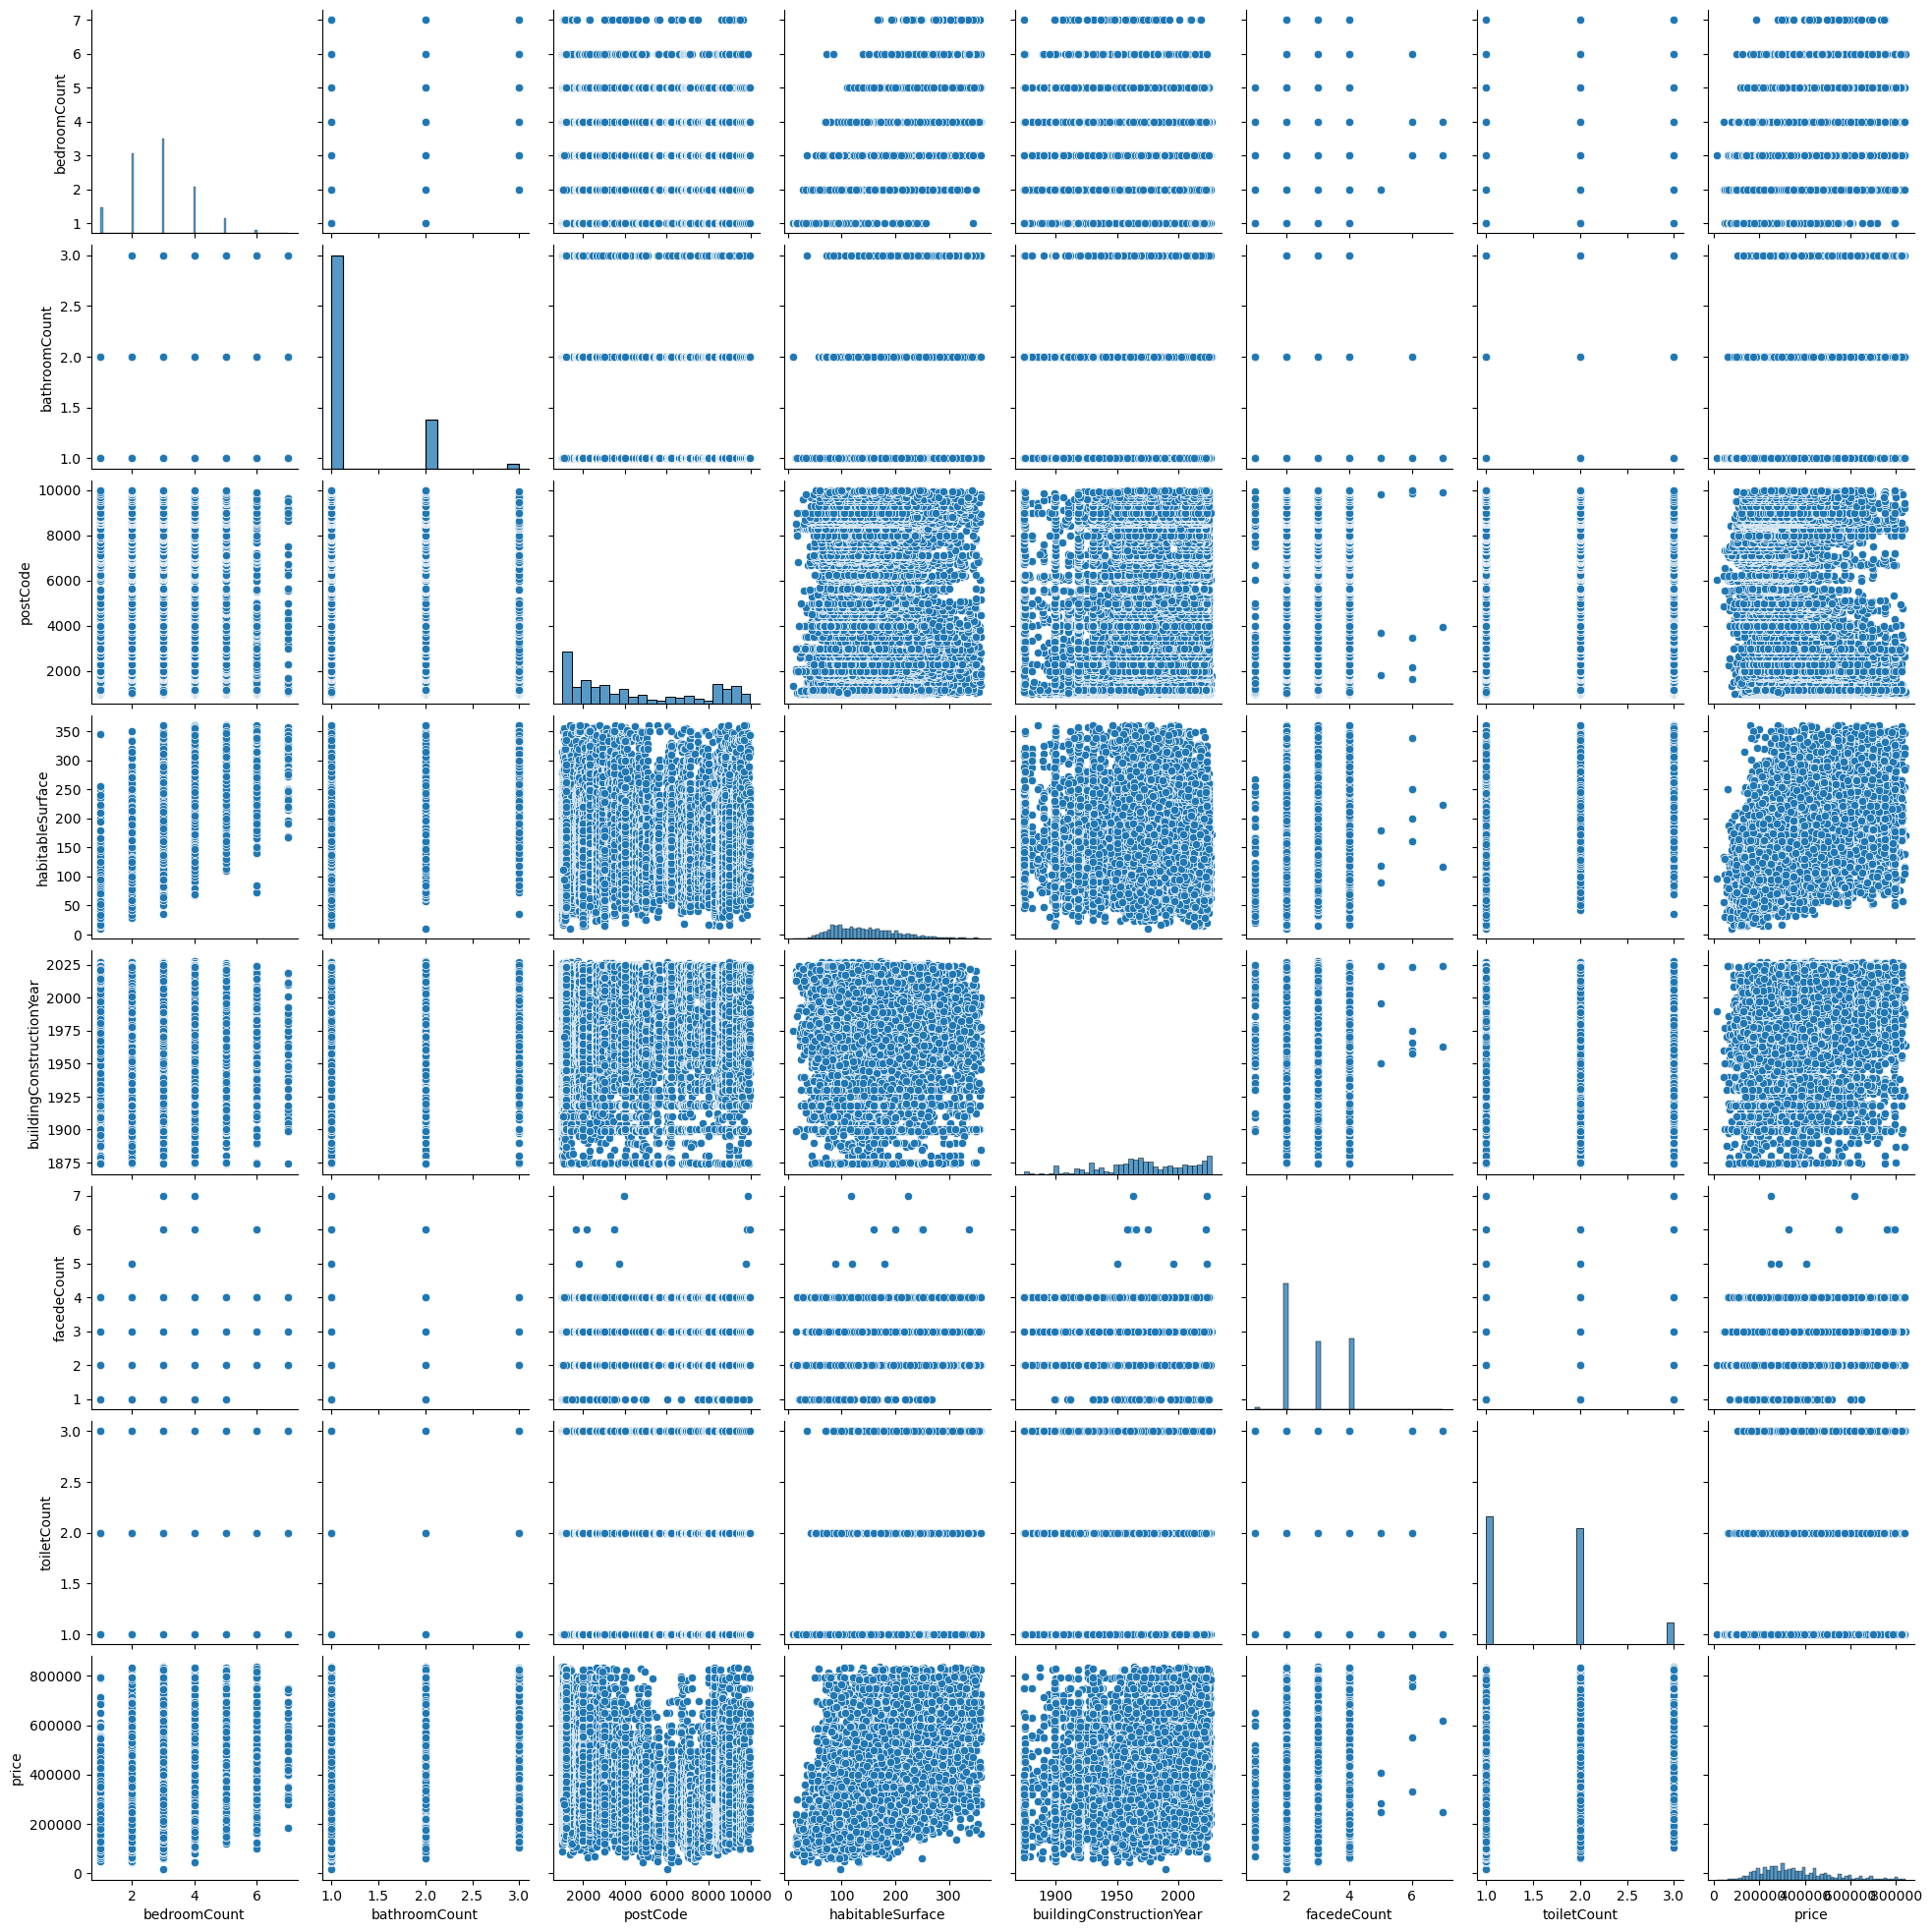

In [63]:
sns.pairplot(numeric_cols)

In [ ]:
numeric_cols_with_outliers.describe()

bedroomCount  bathroomCount      postCode  habitableSurface  \
count  34003.000000   33571.000000  34219.000000      33490.000000   
mean       3.102344       1.478627   4673.987755        183.003434   
std        1.613807       6.325166   2993.429105        416.553089   
min        1.000000       1.000000   1000.000000         10.000000   
25%        2.000000       1.000000   2000.000000         98.000000   
50%        3.000000       1.000000   4000.000000        146.000000   
75%        4.000000       2.000000   7950.000000        213.000000   
max      100.000000    1146.000000   9992.000000      52237.000000   

       buildingConstructionYear   facedeCount   toiletCount         price  
count              28284.000000  30932.000000  32216.000000  3.421900e+04  
mean                1969.720231      2.812848      1.906258  4.707275e+05  
std                   40.451098      0.992252     10.964018  5.222590e+05  
min                 1753.000000      1.000000      1.000000  1.499900e+04  
25%                 1950.000000      2.000000      1.000000  2.390000e+05  
50%                 1972.000000      3.000000      2.000000  3.390000e+05  
75%                 2002.000000      4.000000      2.000000  4.990000e+05  
max                 2028.000000     86.000000   1958.000000  9.795000e+06

In [ ]:
numeric_cols.describe()

bedroomCount  bathroomCount      postCode  habitableSurface  \
count  17600.000000   17600.000000  17600.000000      17600.000000   
mean       2.845682       1.219261   4494.881193        148.521080   
std        1.114168       0.455090   3014.380342         66.004637   
min        1.000000       1.000000   1000.000000         10.000000   
25%        2.000000       1.000000   1827.500000         96.000000   
50%        3.000000       1.000000   3500.500000        140.000000   
75%        3.000000       1.000000   7700.000000        188.000000   
max        7.000000       3.000000   9991.000000        360.000000   

       buildingConstructionYear   facedeCount   toiletCount          price  
count              17600.000000  17600.000000  17600.000000   17600.000000  
mean                1972.501875      2.783523      1.600170  359498.215057  
std                   35.925922      0.850733      0.634062  155569.697656  
min                 1874.000000      1.000000      1.000000   14999.000000  
25%                 1951.000000      2.000000      1.000000  245000.000000  
50%                 1972.000000      3.000000      2.000000  330000.000000  
75%                 2004.000000      4.000000      2.000000  449000.000000  
max                 2028.000000      7.000000      3.000000  839000.000000

In [533]:
numeric_cols.drop(columns="postCode", inplace=True)

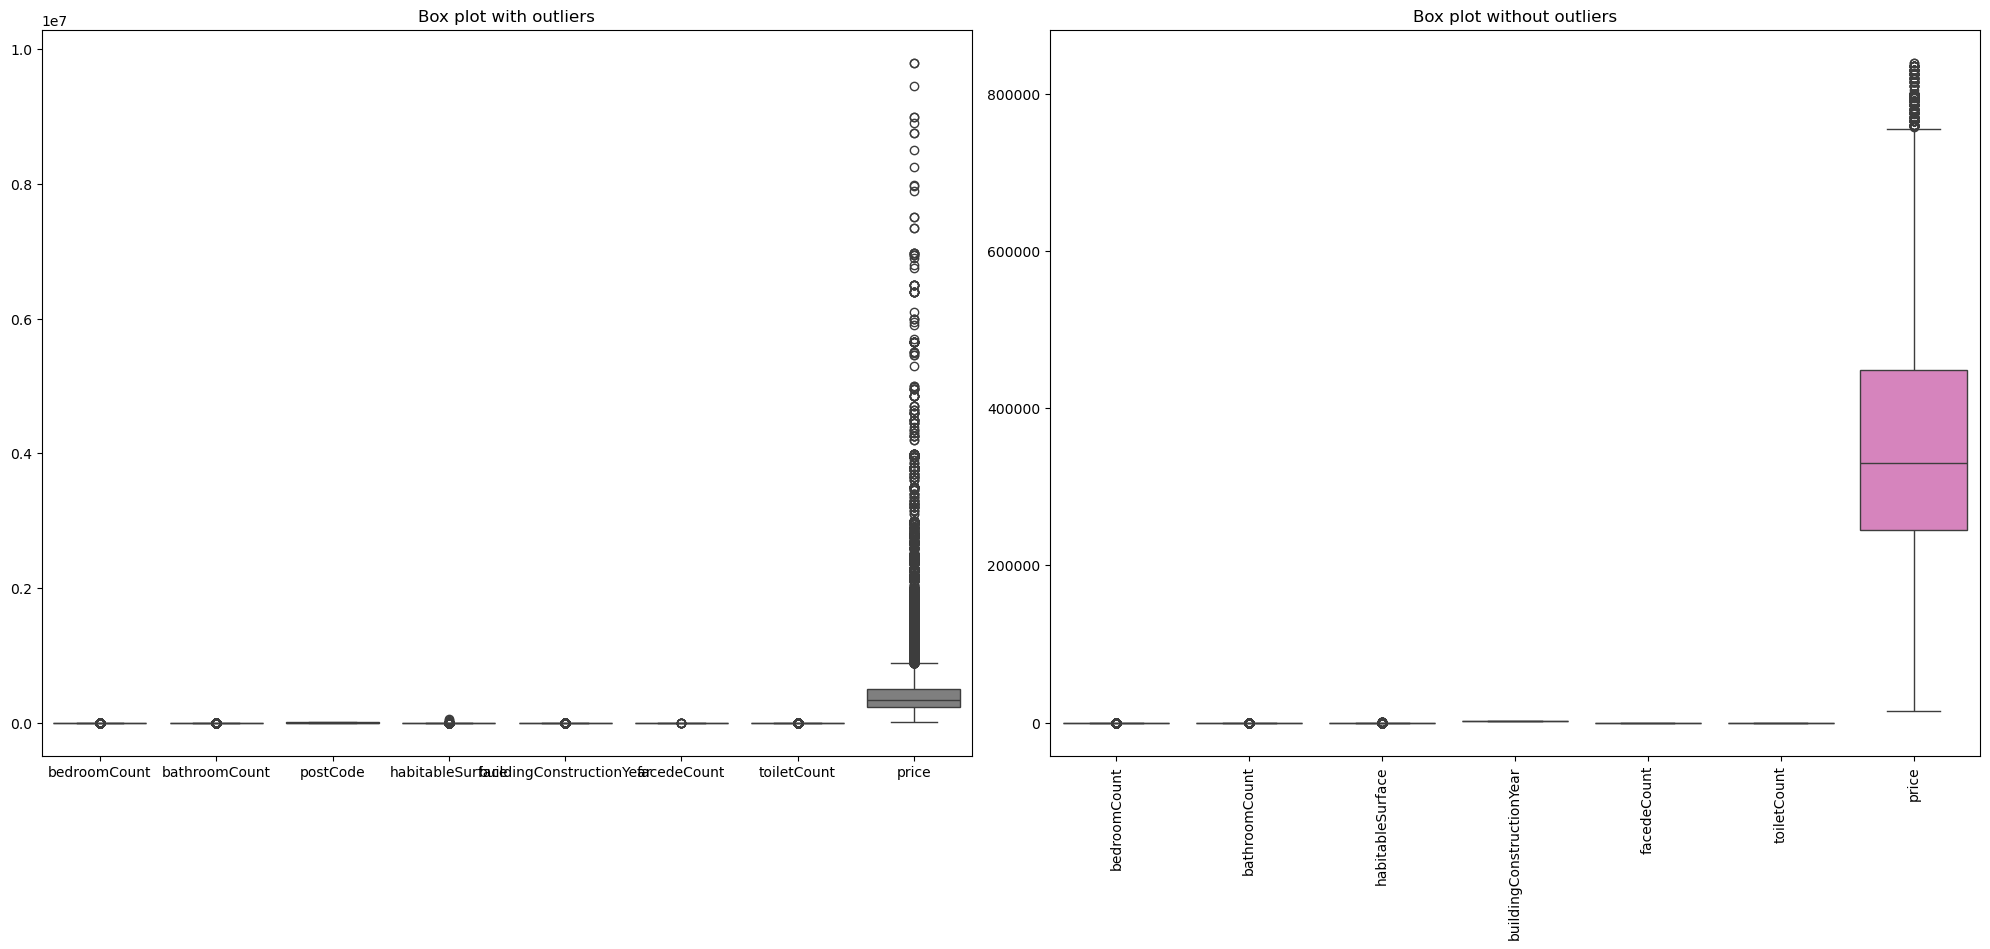

In [534]:
fig, axes = plt.subplots(1, 2, figsize=( 20,8)) 

sns.boxplot(numeric_cols_withoutliers,  ax=axes[0])

axes[0].set_title("Box plot with outliers")

sns.boxplot(numeric_cols,  ax=axes[1])

axes[1].set_title("Box plot without outliers")

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [110]:

for col in numeric_cols:
    sns.histplot(data = numeric_cols[col], hue="province")
    plt.show()

ValueError: The following variable cannot be assigned with wide-form data: `hue`

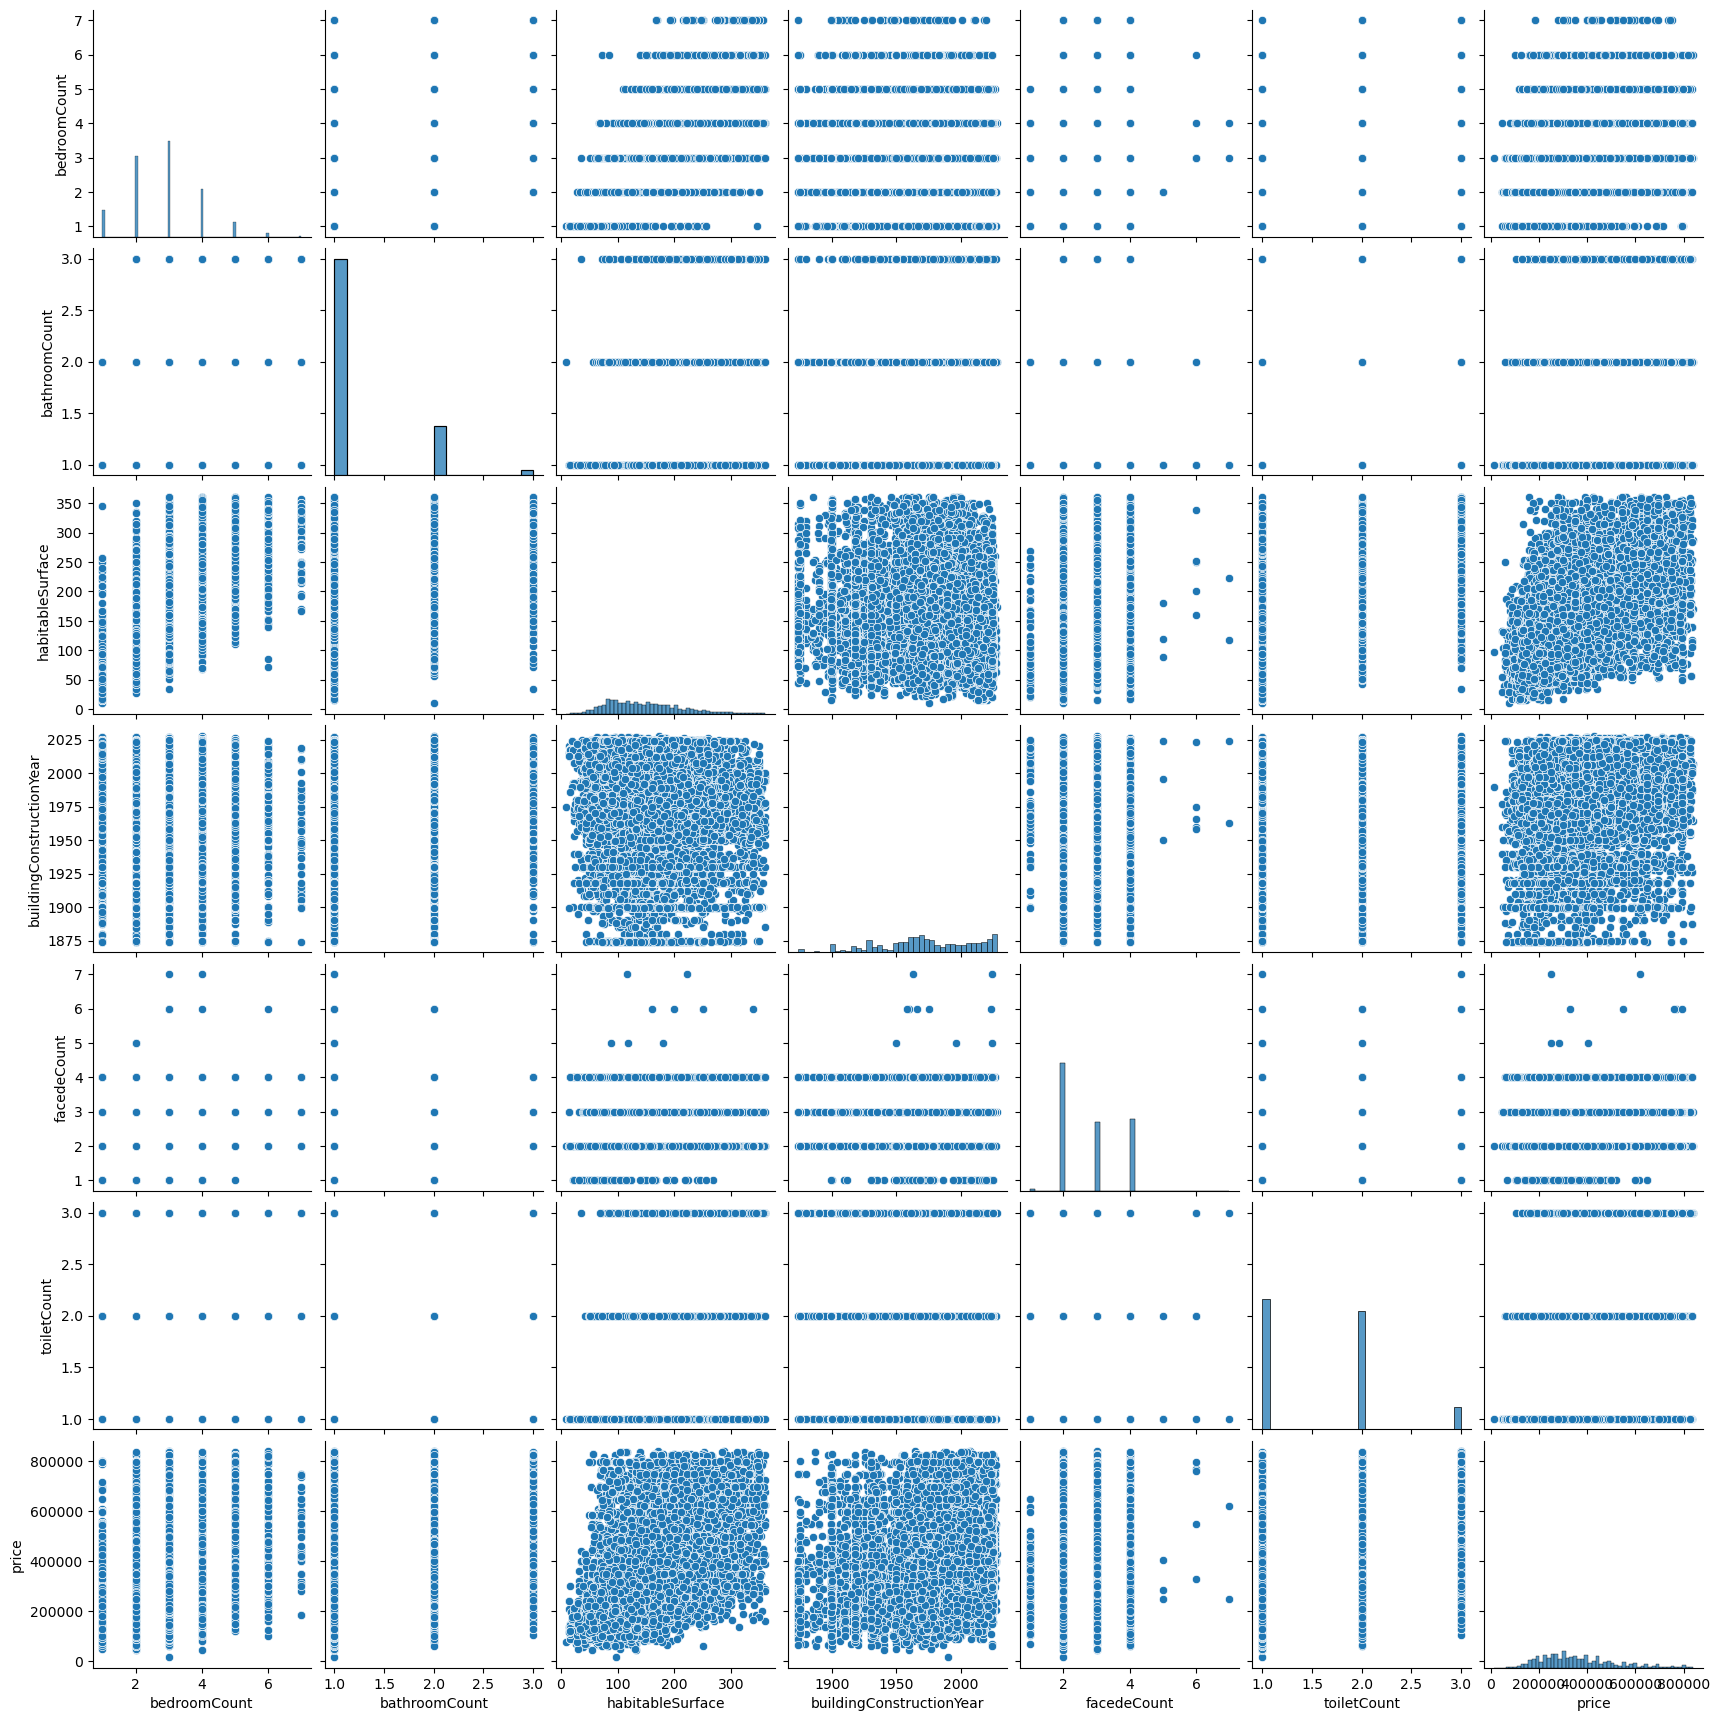

In [536]:
sns.pairplot(numeric_cols)
plt.show()

In [537]:
df=df[~(df["bedroomCount"].isnull())]
df=df[~(df["facedeCount"].isnull())]
df.isnull().sum(), df.shape

(type                 0
 subtype              0
 bedroomCount         0
 bathroomCount        1
 province             0
 locality             0
 postCode             0
 habitableSurface     0
 buildingCondition    0
 facedeCount          0
 heatingType          0
 toiletCount          0
 epcScore             0
 price                0
 dtype: int64,
 (30716, 14))

In [538]:
cat_cols=df.select_dtypes("object")
for col in cat_cols:
    df[col]=df[col].str.lower()
    print(f"{col} :{df[col].nunique()} : {df[col].unique()}")

type :2 : ['apartment' 'house']
subtype :24 : ['apartment' 'house' 'flat_studio' 'duplex' 'penthouse' 'apartment_block'
 'mansion' 'exceptional_property' 'mixed_use_building' 'triplex'
 'ground_floor' 'loft' 'villa' 'town_house' 'kot' 'farmhouse' 'bungalow'
 'service_flat' 'chalet' 'country_cottage' 'other_property' 'manor_house'
 'castle' 'pavilion']
province :11 : ['brussels' 'antwerp' 'west flanders' 'liège' 'east flanders'
 'walloon brabant' 'luxembourg' 'flemish brabant' 'namur' 'limburg'
 'hainaut']
locality :2586 : ['etterbeek' 'bruxelles' 'brussels' ... 'grammene' 'wontergem' 'wippelgem']
habitableSurface :1 : [nan 'missing']
buildingCondition :7 : ['good' 'to_be_done_up' 'as_new' 'just_renovated' 'to_renovate' 'missing'
 'to_restore']
heatingType :8 : ['gas' 'fueloil' 'missing' 'electric' 'pellet' 'solar' 'wood' 'carbon']
toiletCount :1 : [nan 'missing']
epcScore :17 : ['c' 'e' 'f' 'd' 'g' 'b' 'a' 'missing' 'a++' 'a+' 'g_c' 'f_d' 'e_d' 'f_c'
 'e_c' 'x' 'c_b']


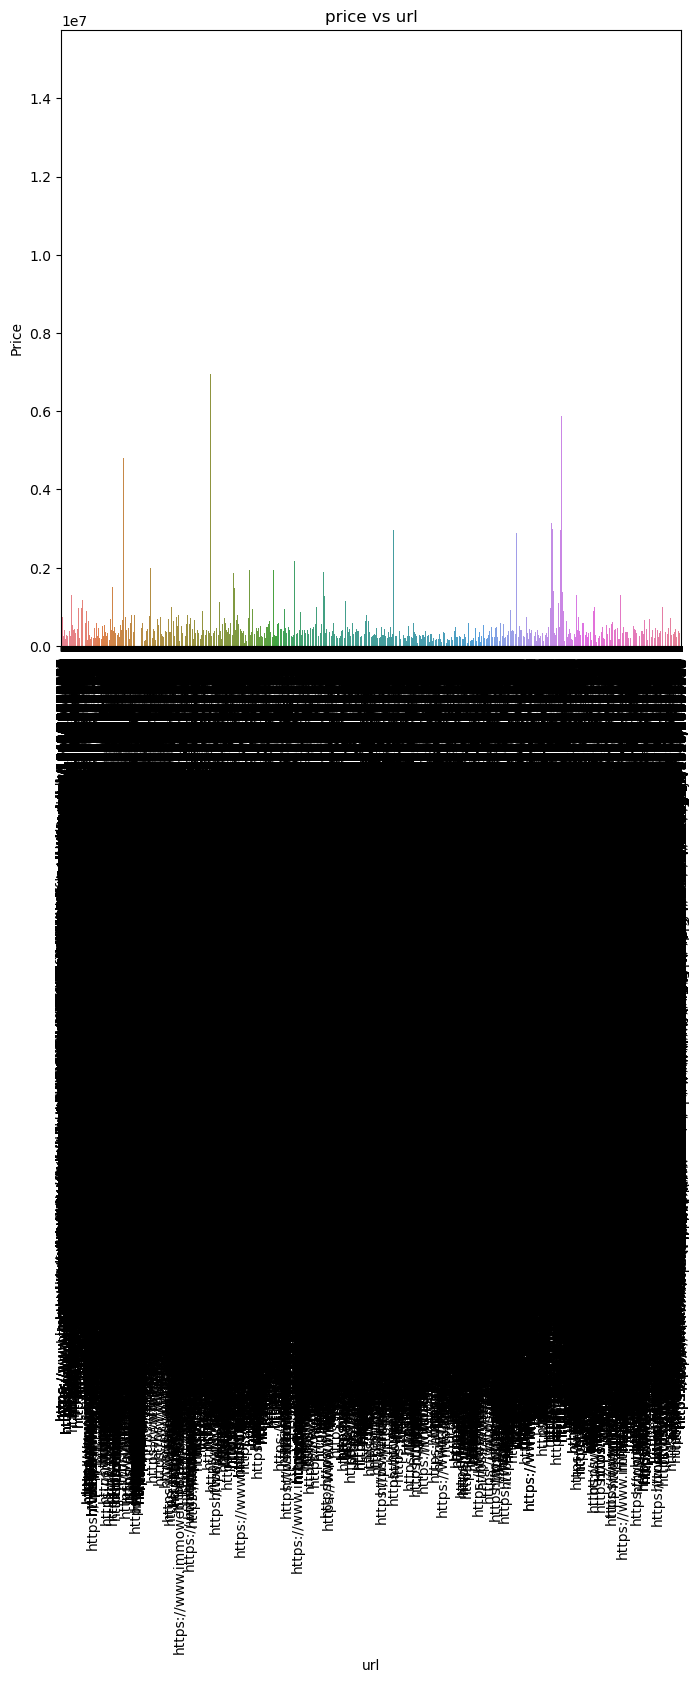

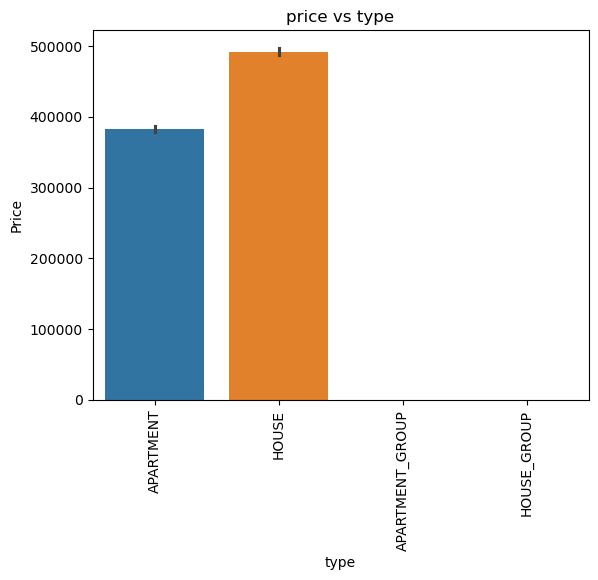

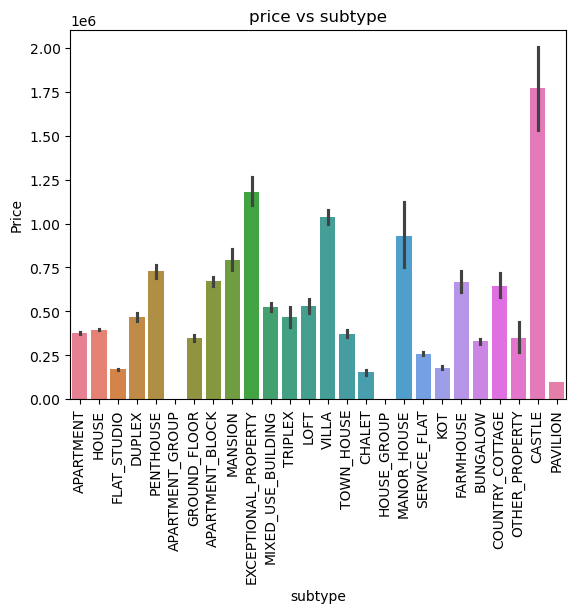

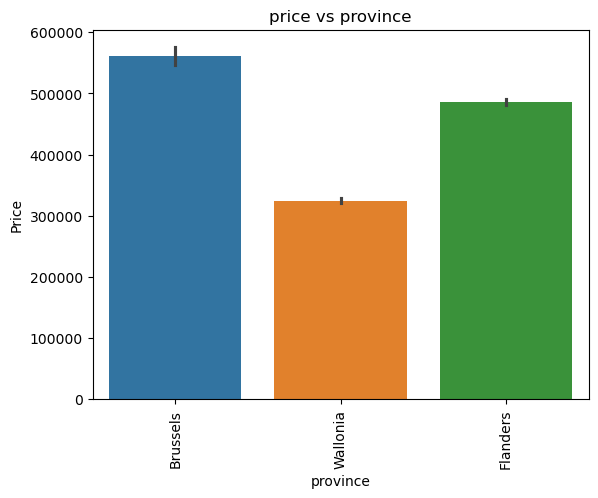

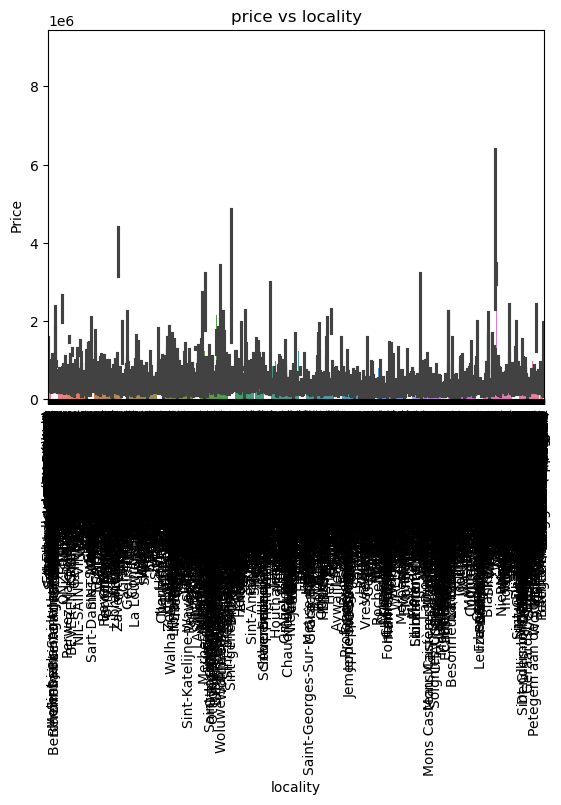

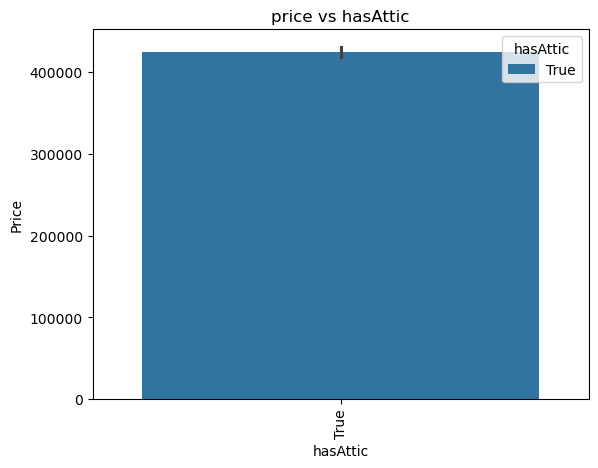

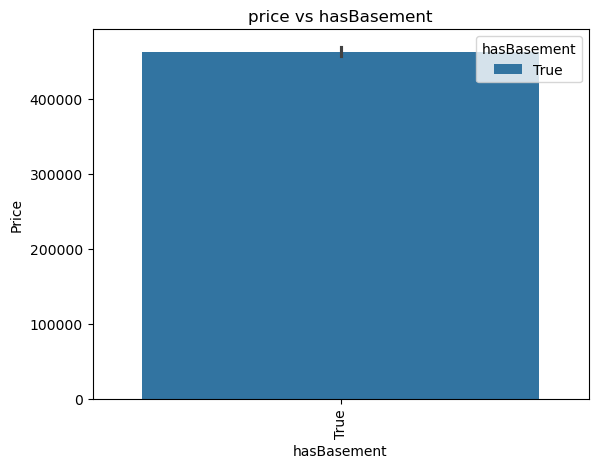

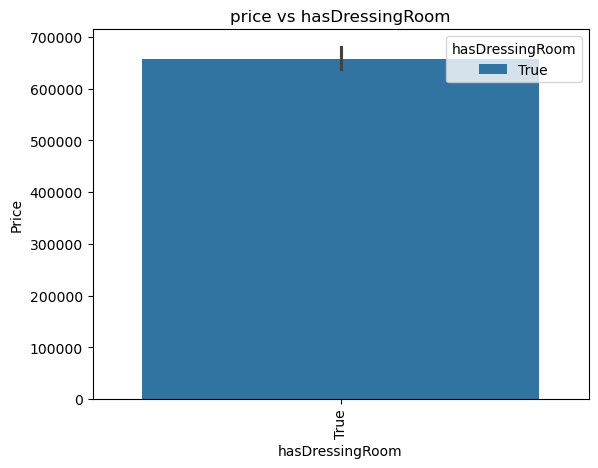

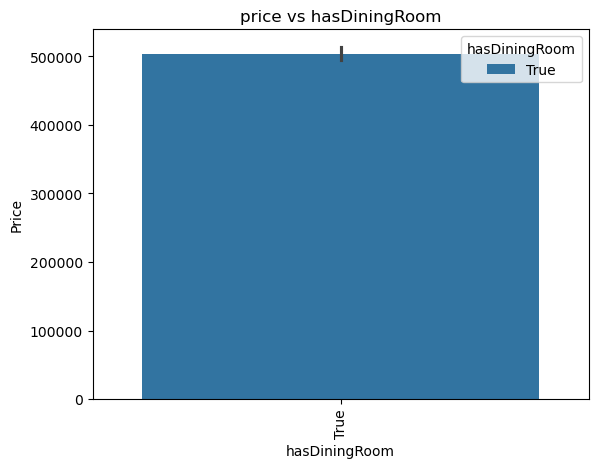

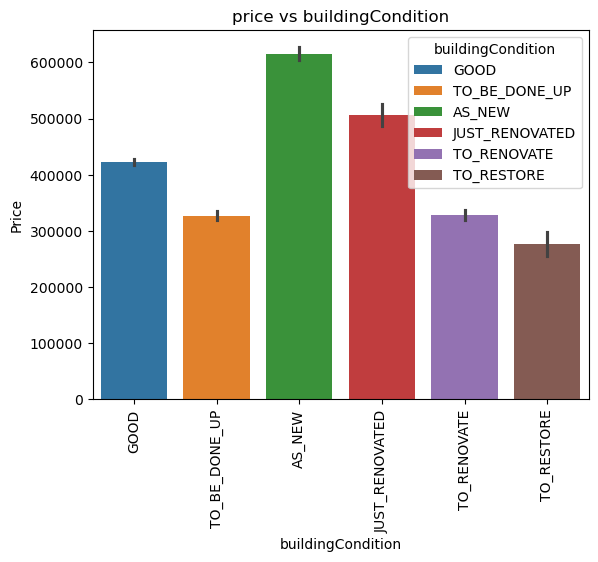

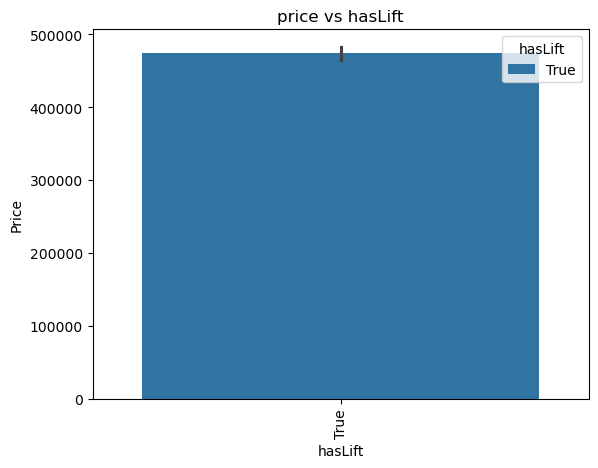

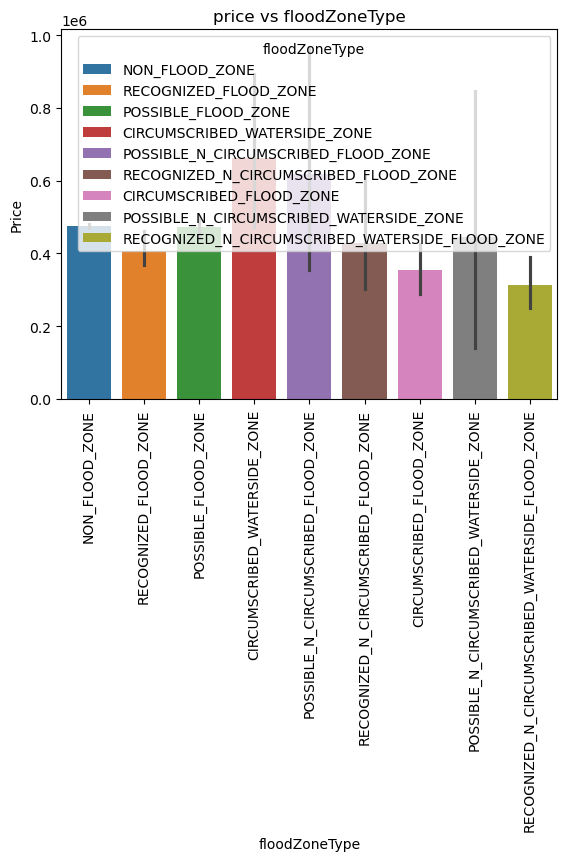

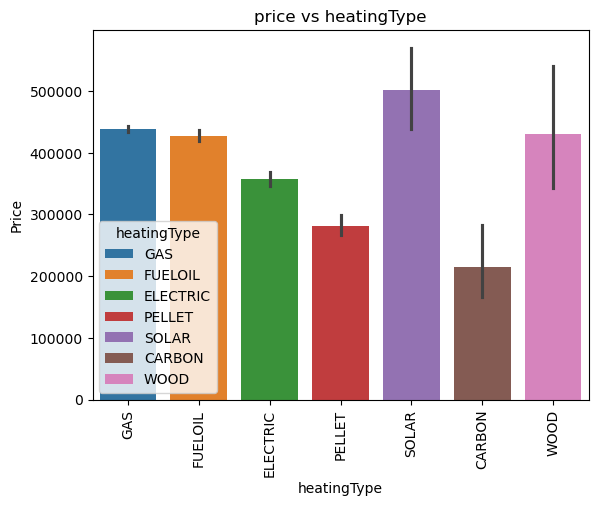

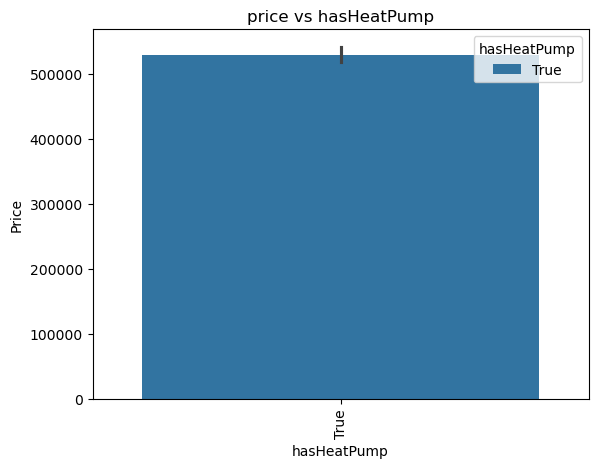

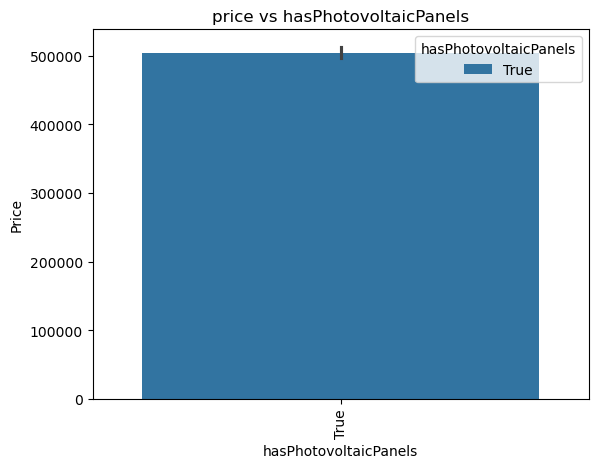

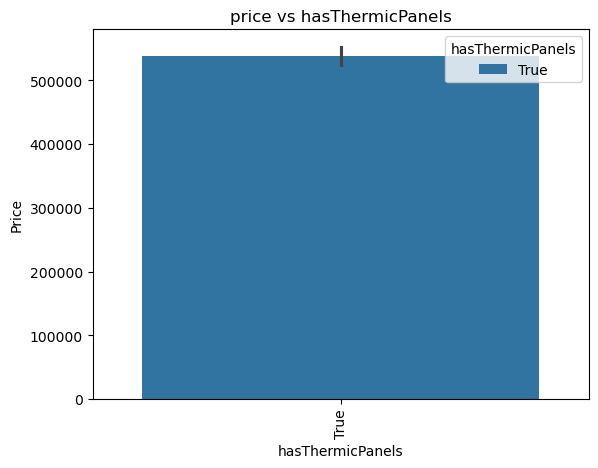

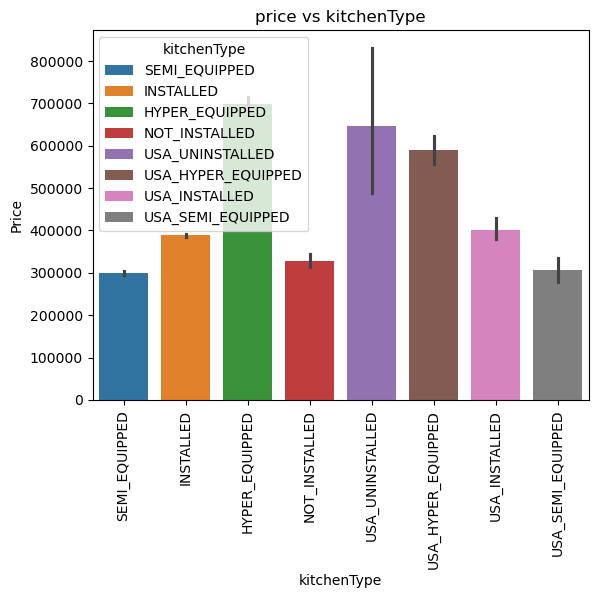

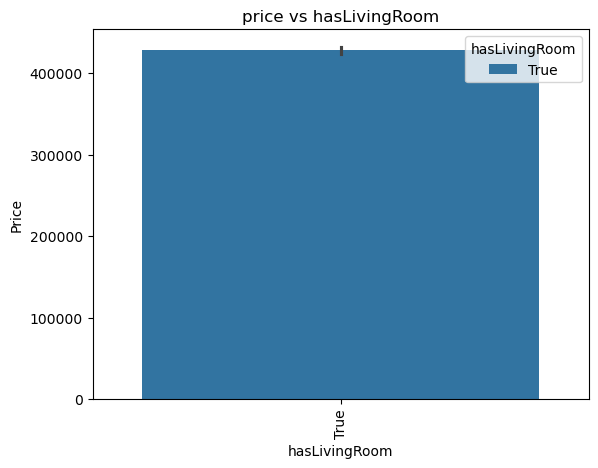

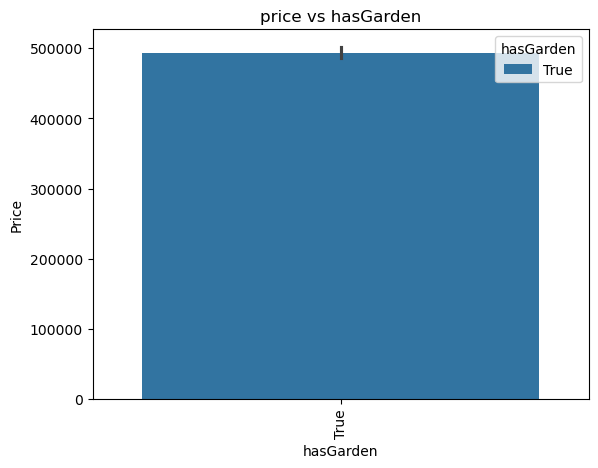

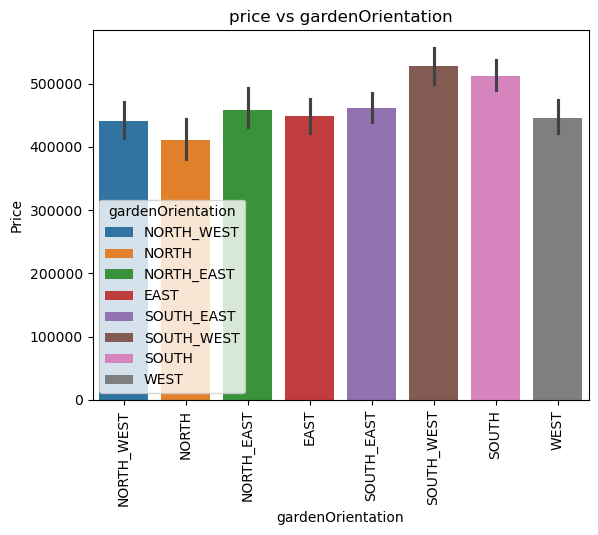

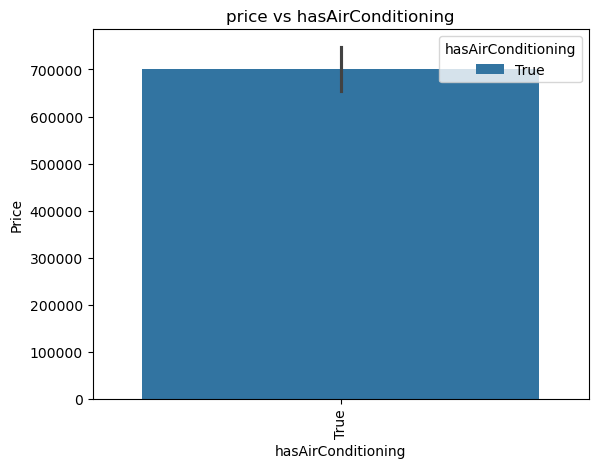

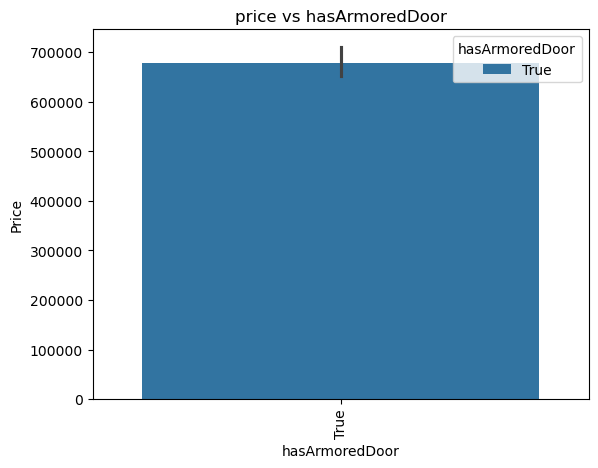

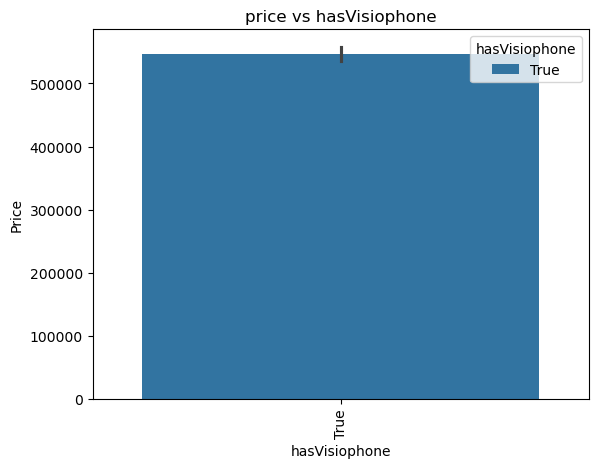

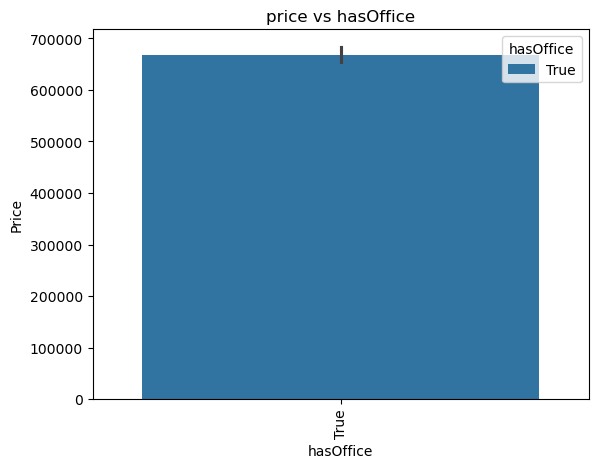

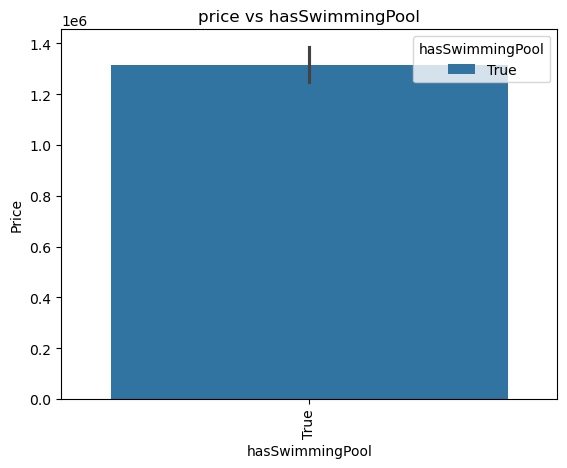

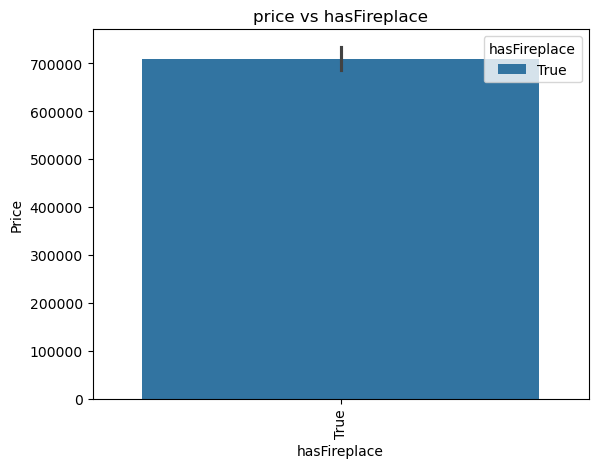

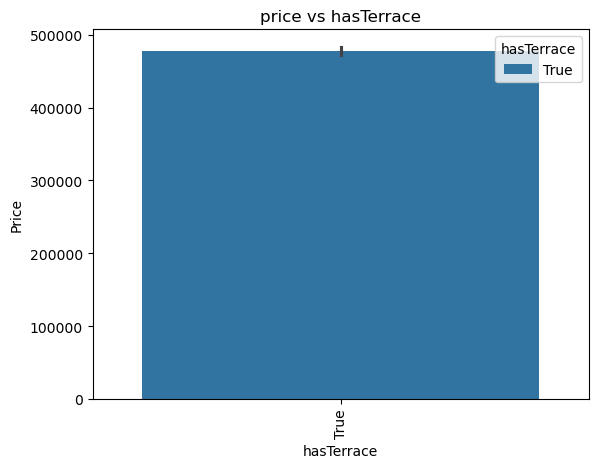

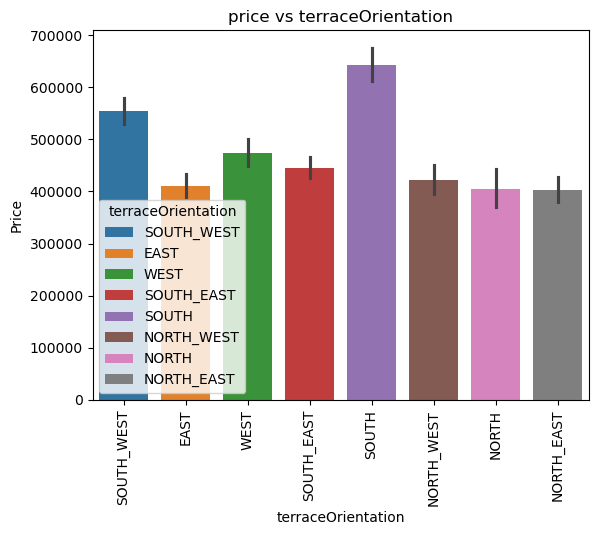

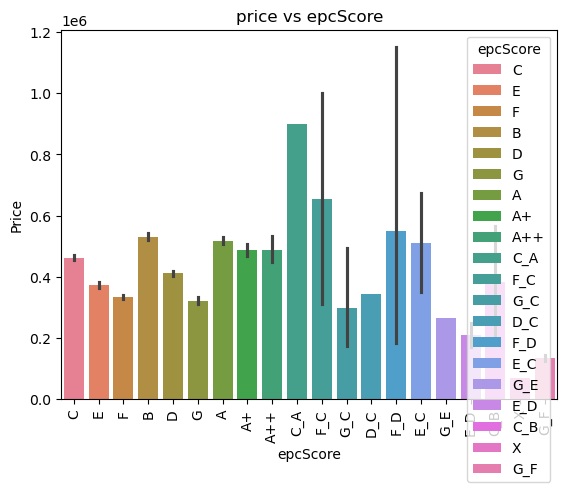

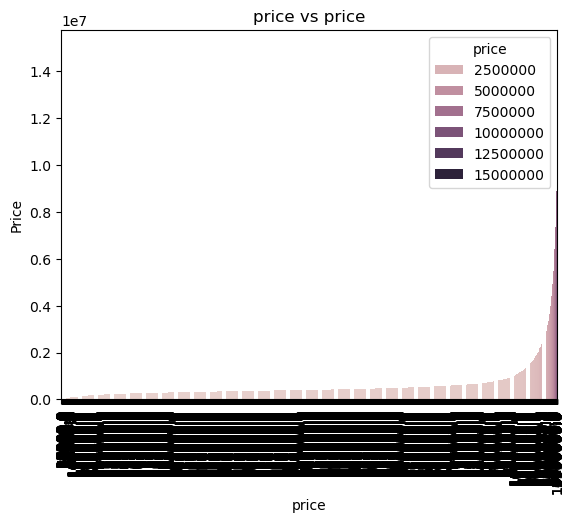

In [109]:
cat_cols = df.select_dtypes("object")
cat_cols["price"]=df["price"]
plt.figure(figsize=(8,8))
for col in cat_cols:
    
    sns.barplot(data= cat_cols,x=col,y="price", hue=col)
    plt.title(f"price vs {col}")
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
sns.histplot(df)
plt.show()

In [ ]:
df["epcScore"].value_counts()

In [ ]:
df["epcScore"]=df["epcScore"].str.replace(["G_C"|"E_C"|"C_B"|"E_D"|"F_C"|"F_D"|"G_E"|"D_C"|"X"|"G_F"],"not_good")

In [ ]:
for col in df.columns:
    print(f"{col} --------{df[col].dtype}")
    print()